# checking LO files for ariane troubleshooting

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = xr.open_dataset('/data1/parker/LO_roms/cas6_v1_live/f2023.08.01/ocean_his_0003.nc')

In [3]:
x = [288,289,290]
y = [953,954,955]

X, Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()

u = [np.round(d.u[0,0,Y[i],X[i]].values,3) for i in range(len(X))]
v = [np.round(d.v[0,0,Y[i],X[i]].values,3) for i in range(len(X))]
w = [np.round(d.w[0,0,Y[i],X[i]].values,3) for i in range(len(X))]

Text(0.5, 1.0, 'w')

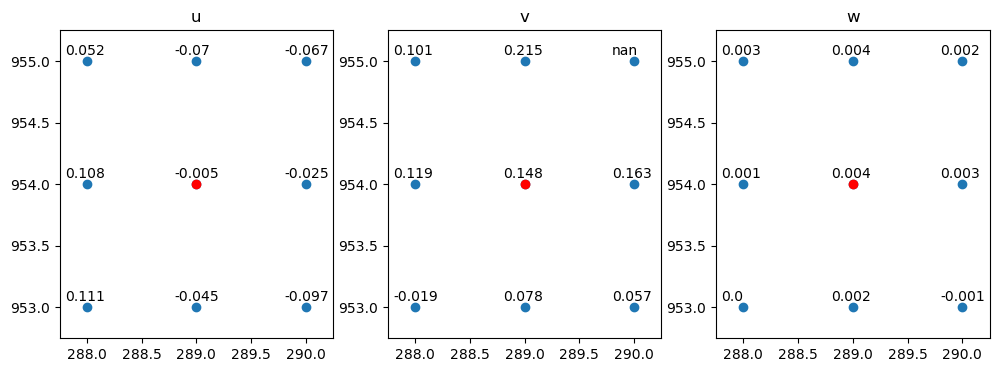

In [4]:
fig, ax = plt.subplots(1,3,figsize =[12,4])

for i in range(len(ax)):
    ax[i].scatter(X,Y)
    ax[i].scatter(289,954,color='r',zorder=2)
    ax[i].set_ylim([952.75,955.25])
    ax[i].set_xlim([287.75,290.25]) 

for i, txt in enumerate(u):
    ax[0].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[0].set_title('u')

for i, txt in enumerate(v):
    ax[1].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[1].set_title('v')

for i, txt in enumerate(w):
    ax[2].annotate(txt, (X[i]-0.2, Y[i]+0.05))
ax[2].set_title('w')

In [5]:
for i in range(len(d.s_rho)):
    u = np.round(d.u[0,i,955,290].values,3) 
    v = np.round(d.v[0,i,955,290].values,3) 
    w = np.round(d.w[0,i,955,290].values,3) 

    print("u= "+str(u)+", v= "+str(v)+", w= "+str(w))

u= -0.067, v= nan, w= 0.002
u= -0.073, v= nan, w= 0.002
u= -0.078, v= nan, w= 0.003
u= -0.112, v= nan, w= 0.003
u= -0.13, v= nan, w= 0.004
u= -0.112, v= nan, w= 0.004
u= -0.077, v= nan, w= 0.004
u= -0.047, v= nan, w= 0.004
u= -0.039, v= nan, w= 0.004
u= -0.055, v= nan, w= 0.004
u= -0.069, v= nan, w= 0.004
u= -0.115, v= nan, w= 0.004
u= -0.143, v= nan, w= 0.004
u= -0.152, v= nan, w= 0.004
u= -0.158, v= nan, w= 0.004
u= -0.139, v= nan, w= 0.004
u= -0.109, v= nan, w= 0.004
u= -0.081, v= nan, w= 0.003
u= -0.061, v= nan, w= 0.003
u= -0.038, v= nan, w= 0.003
u= -0.025, v= nan, w= 0.002
u= -0.007, v= nan, w= 0.002
u= 0.001, v= nan, w= 0.002
u= 0.017, v= nan, w= 0.001
u= 0.024, v= nan, w= 0.001
u= 0.037, v= nan, w= 0.001
u= 0.043, v= nan, w= 0.001
u= 0.054, v= nan, w= 0.0
u= 0.061, v= nan, w= 0.0
u= 0.074, v= nan, w= 0.0


# where is this nan in the model?

/tmp/ipykernel_55169/1979407392.py:8: UserWarning: linewidths is ignored by contourf
  ax.contourf(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


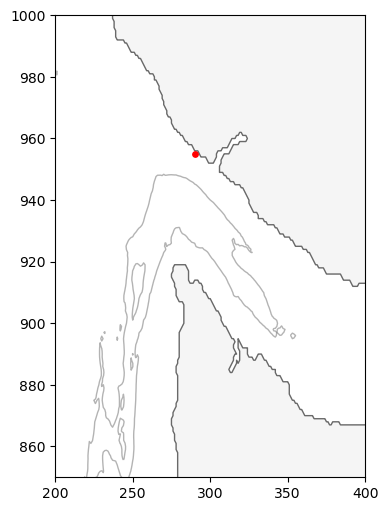

In [6]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')


fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

ax.set_ylim([850,1000])
ax.set_xlim([200,400])

ax.scatter(290,955,color='r',s=15, zorder=2)

# ax.scatter()

#### have it working now! 
the problem was the grid, fine that v is nan there bc it is on the coast - it was Ariane that was having rouble with the ROMS grid not the model that was the problem. Fixed by setting where nan replace with 0 in ariane "sub_input_data_seq_main()"

## check if test run looks good:

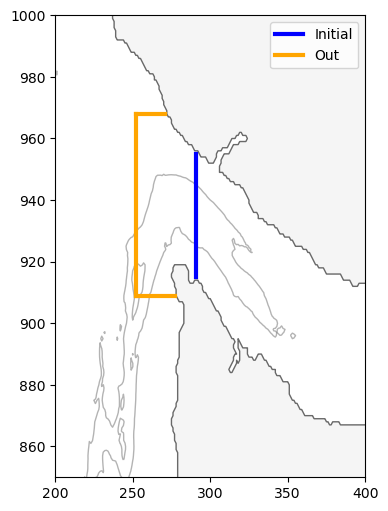

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

ax.plot([291,291],[915,955],linewidth=3,c='b',label='Initial')
ax.plot([252,277],[909,909],linewidth=3,c='orange',label='Out')
ax.plot([252,271],[968,968],linewidth=3,c='orange')
ax.plot([252,252],[909,968],linewidth=3,c='orange')
ax.legend()

ax.set_ylim([850,1000])
ax.set_xlim([200,400]);

In [8]:
run = xr.open_dataset('/data1/bbeutel/LO_user/ariane/test/for_20180101/ariane_positions_quantitative.nc')

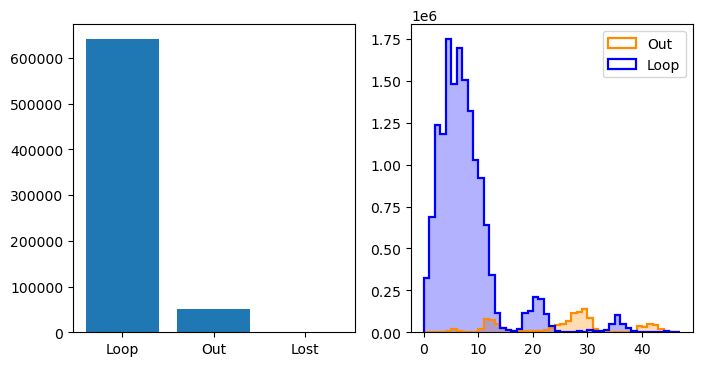

In [9]:
to_hours = (1.15741*10**-14)*24
colours = ['b', 'darkorange']

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].bar(['Loop','Out','Lost'],[np.sum(run.final_transp[run.final_section==0])/24,np.sum(run.final_transp[run.final_section==2])/24,np.sum(run.final_section[(run.final_section!=0)&(run.final_section!=2)])/24])

bins = np.arange(0,48,1)
n, _, _ = ax[1].hist([(run.final_age[run.final_section==0]*to_hours).astype(int), (run.final_age[run.final_section==2]*to_hours).astype(int)], 
                     bins=bins, weights=[run.final_transp[run.final_section==0], run.final_transp[run.final_section==2]], 
                     color = colours, label =['Loop','Out','Lost'], linewidth = 1.6, histtype='step', stacked=False, zorder=2)
ax[1].hist([(run.final_age[run.final_section==0]*to_hours).astype(int), (run.final_age[run.final_section==2]*to_hours).astype(int)], 
           bins=bins, weights=[run.final_transp[run.final_section==0], run.final_transp[run.final_section==2]], 
           color = colours, histtype='stepfilled', alpha=0.3, stacked=False, zorder=1)
ax[1].legend()